In [1]:
# download a small Glove model (Wikipedia+Gigaword, 50D)

import gensim.downloader as api
glove = api.load('glove-wiki-gigaword-50')

AttributeError: module 'glove-wiki-gigaword-50' has no attribute 'load_data'

In [3]:
from gensim.models import KeyedVectors
path = "/Users/raeez/gensim-data/glove-wiki-gigaword-50/glove-wiki-gigaword-50.gz"

# Load using the word2vec format (GloVe files on gensim-data are in this format)
glove = KeyedVectors.load_word2vec_format(path, binary=False)

In [19]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [5]:
len(glove['science'])

50

In [6]:
dir(glove)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_load_specials',
 '_log_evaluate_word_analogies',
 '_save_specials',
 '_smart_save',
 '_upconvert_old_d2vkv',
 '_upconvert_old_vocab',
 'add_lifecycle_event',
 'add_vector',
 'add_vectors',
 'allocate_vecattrs',
 'closer_than',
 'cosine_similarities',
 'distance',
 'distances',
 'doesnt_match',
 'evaluate_word_analogies',
 'evaluate_word_pairs',
 'expandos',
 'fill_norms',
 'get_index',
 'get_mean_vector',
 'get_normed_vectors',
 'get_vecattr',
 'get_vector',
 'has_index_for',
 'index2entity',
 'index2word',
 'index_to_key',
 'init_sims',
 

In [8]:
print(f'the dict contains {len(glove.key_to_index.keys())} items') # the key of glove.key_to_index are all of the words

the dict contains 400000 items


In [16]:
glove.key_to_index
# these are not tokens, they are list of words for which embeddings vectors have been calculated


{'the': 0,
 ',': 1,
 '.': 2,
 'of': 3,
 'to': 4,
 'and': 5,
 'in': 6,
 'a': 7,
 '"': 8,
 "'s": 9,
 'for': 10,
 '-': 11,
 'that': 12,
 'on': 13,
 'is': 14,
 'was': 15,
 'said': 16,
 'with': 17,
 'he': 18,
 'as': 19,
 'it': 20,
 'by': 21,
 'at': 22,
 '(': 23,
 ')': 24,
 'from': 25,
 'his': 26,
 "''": 27,
 '``': 28,
 'an': 29,
 'be': 30,
 'has': 31,
 'are': 32,
 'have': 33,
 'but': 34,
 'were': 35,
 'not': 36,
 'this': 37,
 'who': 38,
 'they': 39,
 'had': 40,
 'i': 41,
 'which': 42,
 'will': 43,
 'their': 44,
 ':': 45,
 'or': 46,
 'its': 47,
 'one': 48,
 'after': 49,
 'new': 50,
 'been': 51,
 'also': 52,
 'we': 53,
 'would': 54,
 'two': 55,
 'more': 56,
 "'": 57,
 'first': 58,
 'about': 59,
 'up': 60,
 'when': 61,
 'year': 62,
 'there': 63,
 'all': 64,
 '--': 65,
 'out': 66,
 'she': 67,
 'other': 68,
 'people': 69,
 "n't": 70,
 'her': 71,
 'percent': 72,
 'than': 73,
 'over': 74,
 'into': 75,
 'last': 76,
 'some': 77,
 'government': 78,
 'time': 79,
 '$': 80,
 'you': 81,
 'years': 82,
 'i

## explore the vocab

In [20]:
# 10 random words
for idx in np.random.randint(0,len(glove.key_to_index),10):
    print(f'Index {idx:>6} is "{glove.index_to_key[idx]}"')

Index  65500 is "skyler"
Index 228071 is "136.9"
Index 135353 is "interlacing"
Index 361456 is "aramburuzabala"
Index 287740 is "dniepr"
Index 143565 is "sauntering"
Index  60426 is "¢"
Index 373422 is "mbowe"
Index 271146 is "wamberto"
Index 216865 is "taarabt"


## explore the embeddings matrix

In [26]:
# size of embeddings matix
print(f'The embeddings matrix is {glove.vectors.shape}')
print(f'The word "apple" has index #{glove.key_to_index["apple"]}')
#another method
glove.get_index('apple')

The embeddings matrix is (400000, 50)
The word "apple" has index #3292


3292

In [29]:
glove.get_index('applesaa')
#remember its not a tokenizer

KeyError: "Key 'applesaa' not present"

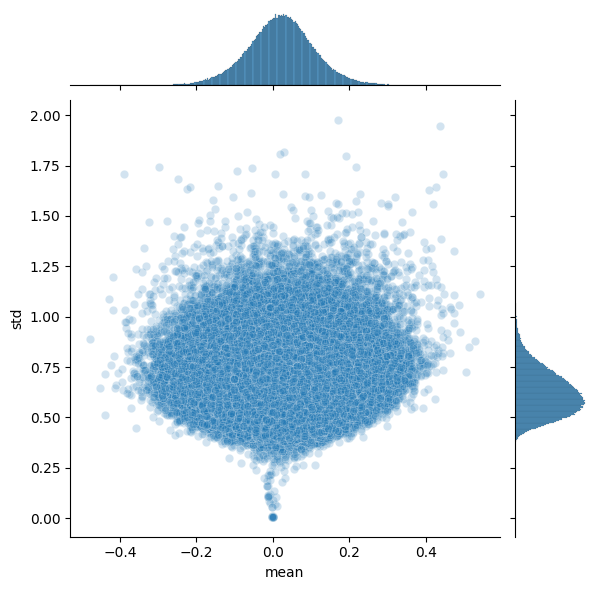

In [51]:
# mean and std of embeddings of words 

emb_mean = glove.vectors.mean(axis=1)
emb_std = glove.vectors.std(axis=1)

import seaborn as sns
import pandas as pd # seaborn works only on pandas DF

df = pd.DataFrame(np.vstack((emb_mean, emb_std)).T, columns=['mean','std'])

sns.jointplot(x='mean', y='std', data=df, alpha=.2)
plt.show()

In [36]:
len(emb_mean)

400000

In [46]:
glove.vectors.shape

(400000, 50)

In [45]:
a=np.array([[1,2,3],[4,5,6]])
a.mean(axis=1)

array([2., 5.])

In [43]:
(1+2+3+4+5+6)/6

3.5

In [54]:
# individual embeding vectors

word = 'banana'
#get its index in embedinng matrix
wordidx = glove.key_to_index[word]

#get embedding vecotr
thisWordVector = glove.vectors[wordidx,:]
print(f'the eembedding vector for "{word} is\n {thisWordVector}')

the eembedding vector for "banana is
 [-0.25522  -0.75249  -0.86655   1.1197    0.12887   1.0121   -0.57249
 -0.36224   0.44341  -0.12211   0.073524  0.21387   0.96744  -0.068611
  0.51452  -0.053425 -0.21966   0.23012   1.043    -0.77016  -0.16753
 -1.0952    0.24837   0.20019  -0.40866  -0.48037   0.10674   0.5316
  1.111    -0.19322   1.4768   -0.51783  -0.79569   1.7971   -0.33392
 -0.14545  -1.5454    0.0135    0.10684  -0.30722  -0.54572   0.38938
  0.24659  -0.85166   0.54966   0.82679  -0.68081  -0.77864  -0.028242
 -0.82872 ]


In [56]:
#easier method
thisWordVector = glove[word]
print(f'the eembedding vector for "{word} is\n {thisWordVector}')

the eembedding vector for "banana is
 [-0.25522  -0.75249  -0.86655   1.1197    0.12887   1.0121   -0.57249
 -0.36224   0.44341  -0.12211   0.073524  0.21387   0.96744  -0.068611
  0.51452  -0.053425 -0.21966   0.23012   1.043    -0.77016  -0.16753
 -1.0952    0.24837   0.20019  -0.40866  -0.48037   0.10674   0.5316
  1.111    -0.19322   1.4768   -0.51783  -0.79569   1.7971   -0.33392
 -0.14545  -1.5454    0.0135    0.10684  -0.30722  -0.54572   0.38938
  0.24659  -0.85166   0.54966   0.82679  -0.68081  -0.77864  -0.028242
 -0.82872 ]


In [58]:
word1 = 'banana'
word2 = 'apple'
word3 = 'cosmic'

ban_app = glove.similarity(word1,word2)
app_cos = glove.similarity(word2, word3)
ban_cos = glove.similarity(word1, word3)
print(f'Cosine similarity of banana and apple is {ban_app}')
print(f'Cosine similarity of apple and cosmic \is {app_cos}')
print(f'Cosine similarity of banan and cosmic \is {ban_cos}')

Cosine similarity of banana and apple is 0.5607928037643433
Cosine similarity of apple and cosmic \is 0.006613151170313358
Cosine similarity of banan and cosmic \is -0.06268235296010971


In [75]:
#methods to idenftify similar and dissimlar words
glove.most_similar('fashion',topn=9)

[('style', 0.760734498500824),
 ('fashions', 0.7528776526451111),
 ('designer', 0.7515820264816284),
 ('chic', 0.7511470913887024),
 ('designers', 0.7450658679008484),
 ('shows', 0.7221301794052124),
 ('couture', 0.7165464758872986),
 ('glamour', 0.7155619263648987),
 ('show', 0.7142423987388611)]

In [81]:
l=['apple','peach','mango','pirate','starfruit']
glove.doesnt_match(l)

'pirate'